In [1]:
import sys
!{sys.executable} -m pip install librosa


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: C:\Users\buchr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

In [3]:
y, sr = librosa.load('C:/Users/buchr/Downloads/brahms5.wav', offset=40, duration=10)

In [4]:
D = librosa.stft(y)

In [5]:
D_harmonic, D_percussive = librosa.decompose.hpss(D)

C:\Users\buchr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\util\decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


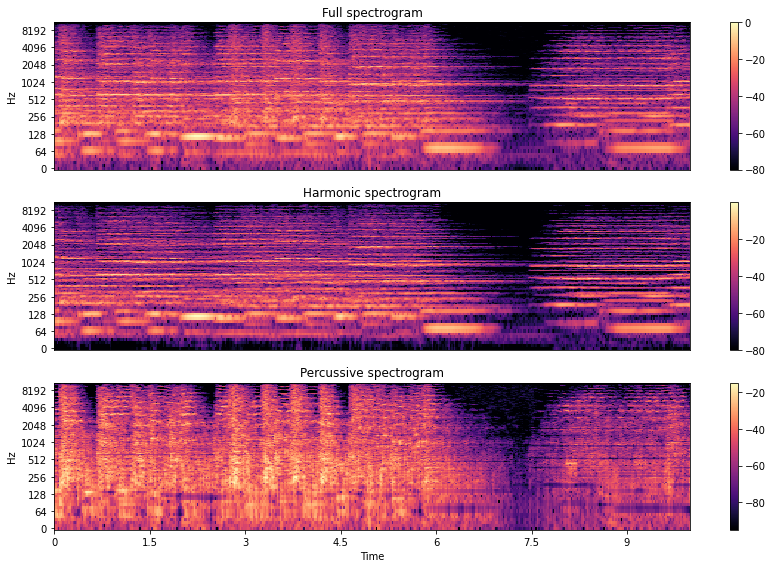

In [6]:
# Pre-compute a global reference power from the input spectrum
rp = np.max(np.abs(D))

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=rp), y_axis='log')
plt.colorbar()
plt.title('Full spectrogram')

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(D_harmonic, ref=rp), y_axis='log')
plt.colorbar()
plt.title('Harmonic spectrogram')

plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(D_percussive, ref=rp), y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Percussive spectrogram')
plt.tight_layout()

In [7]:
# Let's compute separations for a few different margins and compare the results below
D_harmonic2, D_percussive2 = librosa.decompose.hpss(D, margin=2)
D_harmonic4, D_percussive4 = librosa.decompose.hpss(D, margin=4)
D_harmonic8, D_percussive8 = librosa.decompose.hpss(D, margin=8)
D_harmonic16, D_percussive16 = librosa.decompose.hpss(D, margin=16)

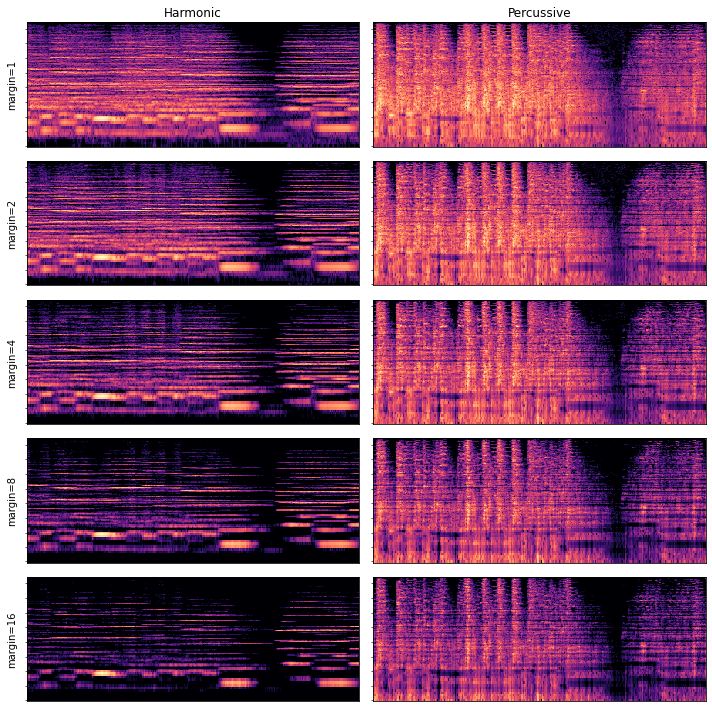

In [8]:
plt.figure(figsize=(10, 10))

plt.subplot(5, 2, 1)
librosa.display.specshow(librosa.amplitude_to_db(D_harmonic, ref=rp), y_axis='log')
plt.title('Harmonic')
plt.yticks([])
plt.ylabel('margin=1')

plt.subplot(5, 2, 2)
librosa.display.specshow(librosa.amplitude_to_db(D_percussive, ref=rp), y_axis='log')
plt.title('Percussive')
plt.yticks([]), plt.ylabel('')

plt.subplot(5, 2, 3)
librosa.display.specshow(librosa.amplitude_to_db(D_harmonic2, ref=rp), y_axis='log')
plt.yticks([])
plt.ylabel('margin=2')

plt.subplot(5, 2, 4)
librosa.display.specshow(librosa.amplitude_to_db(D_percussive2, ref=rp), y_axis='log')
plt.yticks([]) ,plt.ylabel('')

plt.subplot(5, 2, 5)
librosa.display.specshow(librosa.amplitude_to_db(D_harmonic4, ref=rp), y_axis='log')
plt.yticks([])
plt.ylabel('margin=4')

plt.subplot(5, 2, 6)
librosa.display.specshow(librosa.amplitude_to_db(D_percussive4, ref=rp), y_axis='log')
plt.yticks([]), plt.ylabel('')

plt.subplot(5, 2, 7)
librosa.display.specshow(librosa.amplitude_to_db(D_harmonic8, ref=rp), y_axis='log')
plt.yticks([])
plt.ylabel('margin=8')

plt.subplot(5, 2, 8)
librosa.display.specshow(librosa.amplitude_to_db(D_percussive8, ref=rp), y_axis='log')
plt.yticks([]), plt.ylabel('')

plt.subplot(5, 2, 9)
librosa.display.specshow(librosa.amplitude_to_db(D_harmonic16, ref=rp), y_axis='log')
plt.yticks([])
plt.ylabel('margin=16')

plt.subplot(5, 2, 10)
librosa.display.specshow(librosa.amplitude_to_db(D_percussive16, ref=rp), y_axis='log')
plt.yticks([]), plt.ylabel('')

plt.tight_layout()
plt.show()